<a href="https://colab.research.google.com/github/safaa400/safaasalah_46-17921_ML_assignments/blob/main/iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 

In [98]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.preprocessing import StandardScaler

# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [99]:
from sklearn.datasets import load_iris
iris_data = load_iris()
X = iris_data.data 
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']

['setosa', 'versicolor', 'virginica']

In [100]:
df = pd.DataFrame(X, columns=iris_data.feature_names)
df['species'] = iris_data.target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [101]:
X_train=df.iloc[:,[0,1,2,3]].values  


# Kmeans

interia: 78.851441426146
The number of iterations required to converge: 5


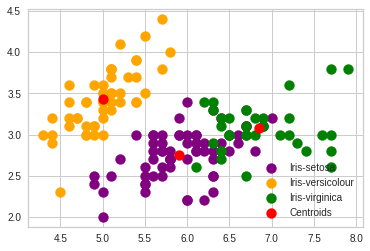

In [102]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train)
#Visualising the clusters
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
inertia=kmeans.inertia_
num_iterations=kmeans.n_iter_
print('interia:',inertia)
print('The number of iterations required to converge:',num_iterations)

interia: 57.22847321428572
The number of iterations required to converge: 4


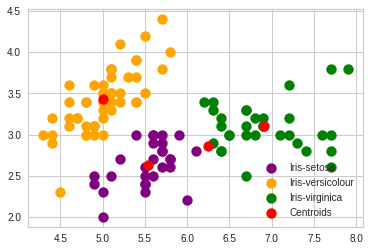

In [103]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train)
#Visualising the clusters
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
inertia=kmeans.inertia_
num_iterations=kmeans.n_iter_
print('interia:',inertia)
print('The number of iterations required to converge:',num_iterations)

SSE_values [681.3706, 152.3479517603579, 78.851441426146, 57.25600931571816, 46.461172672672674, 39.21125347985349] 
 k_values [1, 2, 3, 4, 5, 6]


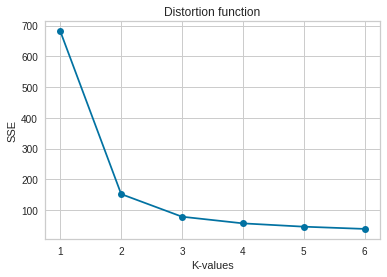

In [104]:
def find_best_clusters(df, maximum_K):
    
    SSE_values = []
    k_values = []
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        SSE_values.append(kmeans_model.inertia_)

        k_values.append(k)
    
    return SSE_values,k_values
X_train=df.iloc[:,[0,1,2,3]].values
SSE_values, k_values=find_best_clusters(X_train,7)
print('SSE_values', SSE_values,'\n','k_values',k_values)
plt.plot(k_values, SSE_values, marker='o')
plt.title('The elbow method')
plt.xlabel("K-values")
plt.ylabel("SSE")
plt.title('Distortion function')
plt.show()

## Using Elbow method 

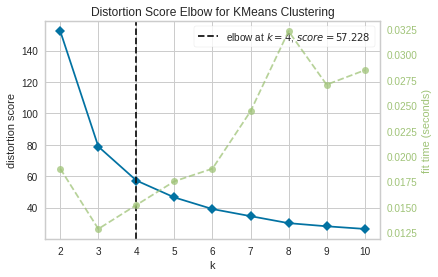

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans()

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X_train)    
elb_visualizer.show()  

_ K=4 is the best using elbow method 

## silhouette_score

silhouette_scores [0.5528190123564095, 0.49805050499728737, 0.48874888709310566, 0.36483400396700255, 0.3475042328046161, 0.3617900335973811] 
 k_values [3, 4, 5, 6, 7, 8]


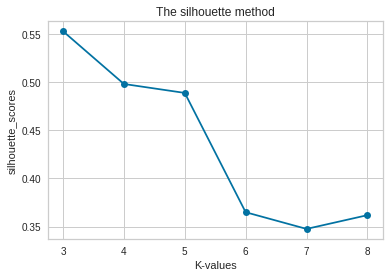

In [106]:
def find_best_clusters(df, maximum_K):
    
    silhouette_scores = []
    k_values = []
    for k in range(3, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        silhouette_scores_values = silhouette_score(df, kmeans_model.labels_, metric='euclidean')
        silhouette_scores.append(silhouette_scores_values)
        k_values.append(k)
    
    return silhouette_scores,k_values
silhouette_scores, k_values=find_best_clusters(X_train,9)
print('silhouette_scores', silhouette_scores,'\n','k_values',k_values)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('The silhouette method')
plt.xlabel("K-values")
plt.ylabel("silhouette_scores")
plt.show()

_ K=3 is the best using  silhouette_score





---



# Hirarical clustering

In [107]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

### linkage 


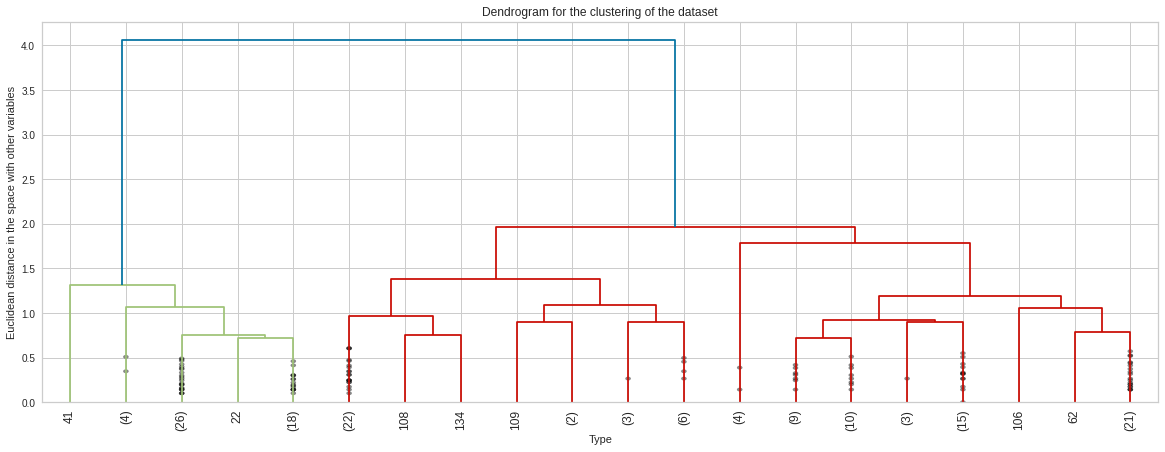

In [108]:
# Average Linkage - Average Distance between all points
Z = sch.linkage(X_train, method = 'average')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True # to get a distribution impression in truncated branches 
)
plt.title('Dendrogram for the clustering of the dataset')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')
plt.show()

In [109]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'average')
model_clt = cluster_H.fit(X_train)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}


In [110]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train,pred1))

Silhouette Score for 2 Clusters
0.6867350732769777


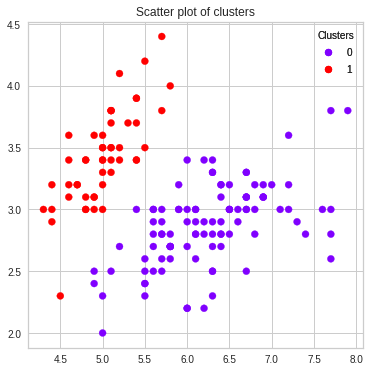

In [111]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

Text(0, 0.5, 'Euclidean distance in the space with other variables')

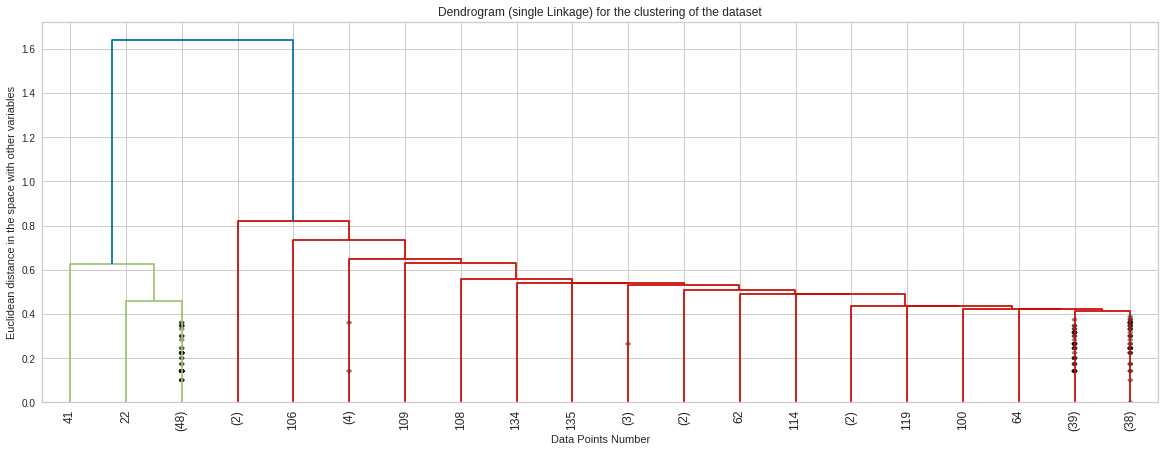

In [112]:
# Dendrogram (single Linkage) 

Z = sch.linkage(X_train, method = 'single')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True)
plt.title('Dendrogram (single Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')
     

In [113]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'single')
model_clt = cluster_H.fit(X_train)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}


In [114]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train,pred1))

Silhouette Score for 2 Clusters
0.6867350732769777


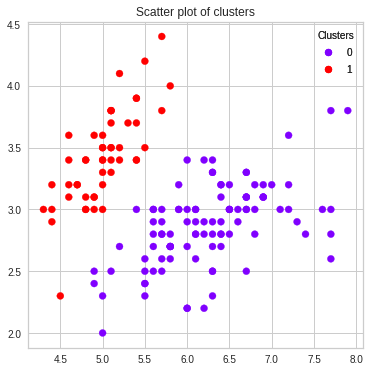

In [115]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

In [116]:
model1_A = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model1_B = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model1_C = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
model1_D = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='average',distance_threshold=0.05)
model1_E = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='average',distance_threshold=0.7)
model1_F = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.3)
model1_G = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=1)
model1_H = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.01)


clus_A = model1_A.fit(X_train)
clus_B = model1_B.fit(X_train)
clus_C = model1_C.fit(X_train)
clus_D = model1_D.fit(X_train)
clus_E = model1_E.fit(X_train)
clus_F = model1_F.fit(X_train)
clus_G= model1_F.fit(X_train)
clus_H= model1_F.fit(X_train)

In [117]:
print('Output Clusters from model A are')
pred1 = clus_A.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model A')
print(silhouette_score(X_train,pred1))

Output Clusters from model A are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}
Silhouette Score for model A
0.6867350732769777


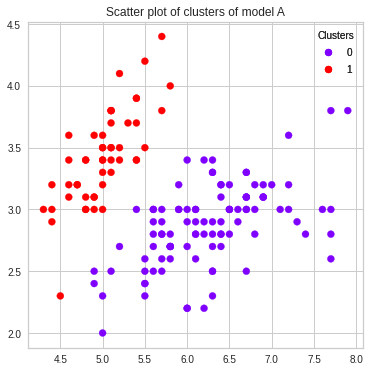

In [118]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model A')

plt.show()

In [119]:
print('Output Clusters from model B are')
pred1 = clus_B.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model B')
print(silhouette_score(X_train,pred1))

Output Clusters from model B are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}
Silhouette Score for model B
0.6867350732769777


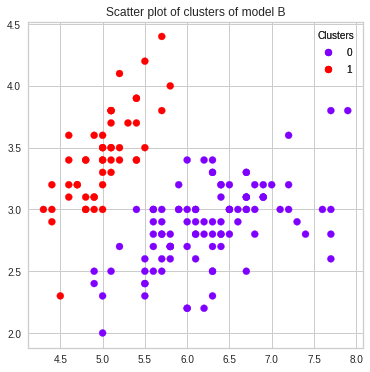

In [120]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model B')

plt.show()

In [121]:
print('Output Clusters from model C are')
pred1 = clus_C.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model C')
print(silhouette_score(X_train,pred1))

Output Clusters from model C are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
{0: 50, 1: 100}
Silhouette Score for model C
0.6867350732769777


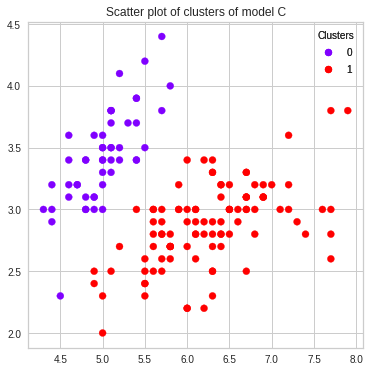

In [122]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model C')

plt.show()

In [123]:
print('Output Clusters from model D are')
pred1 = clus_D.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model D')
print(silhouette_score(X_train,pred1))

Output Clusters from model D are
[147 131 119 136 143  74 113 148 137 146 144  87 126  85 127  77 121 125
 103 142  89 106  75 116 129 122 108 135  73 141  81  91  71 105  93 133
 138  76 139 145 128  95 100 107  86 111 120  94  72  63  46  92 117 115
  52  79  97 140  88  35  36  67 132 130 101  64 118  98  96 112  48  31
 123  84 114  80  65 109 110  59  69  99 134  37 102  55  82  70  60  83
  47  53  50 104 124  66  78  42  32  56  27   0  49  51  40  90  39  45
  68  57  54  29  61  22  19  17  33  58  43  24  26  38  18  62  34  16
  28  15   8  23  44   7  21  10   3  41  25  30  14  13  12  11   0  20
   5   6   9   4   2   1]
{0: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52

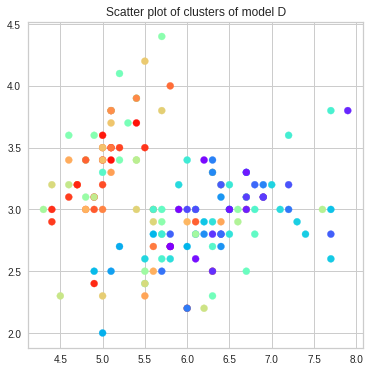

In [124]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model D')

plt.show()

In [125]:
print('Output Clusters from model E are')
pred1 = clus_E.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model E')
print(silhouette_score(X_train,pred1))

Output Clusters from model E are
[ 6  4  4  4  6 12  4  6 18  4  6  4  4 18 35 33 12  6 54  6 24  6 39 44
  4  4 44  6  6  4  4 24 10 10  4  6 24  6 18  6  6 47  4 44 41  4  6  4
  6  6 14  5 14 29 22  1  5  8 22 32  8  1 34 46 43 22 28 50 37 29  7  9
  2 46  9 22 14 48 46 51 29 29 50  2 28  5 14 37  1 29 42 46 50  8  1  1
  1  9 38  1 16 45 52  0 23 13 31 17 15 27 49  0  3 45 25 21  0 53 40 30
 19 45 13  2 19 11  2  7 23 11 17 36 23  2 20 26 21  0  7  3 19  3 45 19
 19  3  2 49 21  7]
{0: 4, 1: 7, 2: 6, 3: 4, 4: 15, 5: 3, 6: 16, 7: 4, 8: 3, 9: 3, 10: 2, 11: 2, 12: 2, 13: 2, 14: 4, 15: 1, 16: 1, 17: 2, 18: 3, 19: 5, 20: 1, 21: 3, 22: 4, 23: 3, 24: 3, 25: 1, 26: 1, 27: 1, 28: 2, 29: 5, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 2, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 3, 45: 4, 46: 4, 47: 1, 48: 1, 49: 2, 50: 3, 51: 1, 52: 1, 53: 1, 54: 1}
Silhouette Score for model E
0.23856894761398673


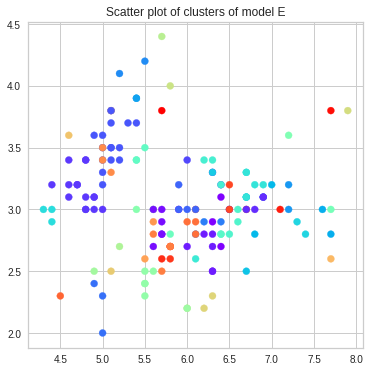

In [126]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model E')

plt.show()

In [127]:
print('Output Clusters from model F are')
pred1 = clus_F.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model F')
# print(silhouette_score(X_train,pred1))

Output Clusters from model F are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 150}
Silhouette Score for model F


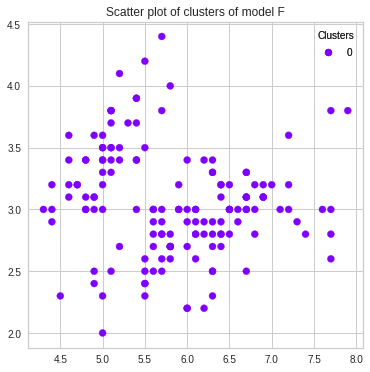

In [128]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model F')

plt.show()

In [129]:
print('Output Clusters from model G are')
pred1 = clus_G.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model G')
# print(silhouette_score(X_train,pred1))

Output Clusters from model G are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 150}
Silhouette Score for model G


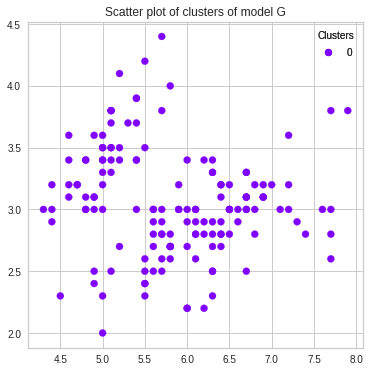

In [130]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model G')

plt.show()



---
## DBscan



In [131]:
from sklearn.cluster import DBSCAN
def all_equal2(iterator):
    return len(set(iterator)) <= 1
EPS=np.arange(0.1,3.1,0.1).tolist()
Min_samples=np.arange(5,26,5).tolist()
silhouette_scores=[]
for i in range(len(EPS)):
  for j in range(len(Min_samples)):
    dbscan = DBSCAN(eps =EPS[i],min_samples =Min_samples[j]).fit(X_train)
    print('___________________________________________________________________________________________')
    print('Output Clusters ','eps=',EPS[i],'min_samples=',Min_samples[j])
    pred1 = dbscan.labels_
# Frequency count of the Output clusters
    unique, counts = np.unique(pred1, return_counts=True)
    print(dict(zip(unique, counts)))
    # Silhouette Score
    print('Silhouette Score')
    flag=all_equal2(pred1)
    if flag==False:
      x=silhouette_score(X_train,pred1)
      print(x)
      silhouette_scores.append(x)
    else:
      print('just 1 cluster label ,cannot calculate silhouette_score')

print('silhouette_scores list',silhouette_scores)

___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 5
{-1: 150}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 10
{-1: 150}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 15
{-1: 150}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 20
{-1: 150}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 25

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
{0: 50, 1: 100}
Silhouette Score
0.6867350732769777


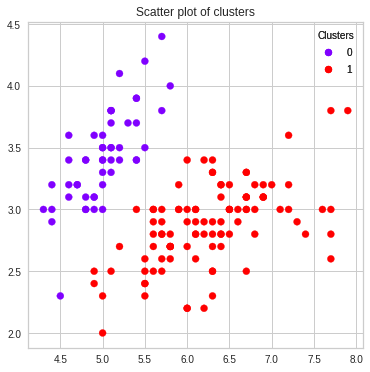

In [132]:
dbscan = DBSCAN(eps =1.6,min_samples =25).fit(X_train)
pred1 = dbscan.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score')
print(silhouette_score(X_train,pred1))
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()



---
## GM


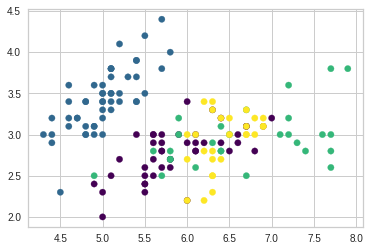

In [133]:
from sklearn.mixture import GaussianMixture
import pandas as pd
gm = GaussianMixture(n_components=4).fit(X_train)
pred = gm.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=pred, s=40, cmap='viridis')
probs = gm.predict_proba(X_train)

In [134]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

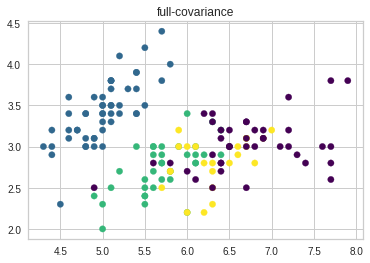

full-covariance probs [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
Silhouette scores for full cov: 0.4130079901573357


In [135]:
from sklearn import metrics # for calculating Silhouette score

cov_lst=['full','tied','diag','spherical']
preds=[]
probs=[]
gmms=[]
S=[]

for i in range(len(cov_lst)):
  gmm = GaussianMixture(n_components=4, covariance_type=cov_lst[i], random_state=42).fit(X_train)
  gmms.append(gmm)
  pred = gmm.predict(X_train)
  preds.append(pred)
  prob = gmm.predict_proba(X_train)
  probs.append(prob)
  S.append(metrics.silhouette_score(X_train,pred, metric='euclidean'))

# print(gmms)

  # print(i, pred )
  # print(preds)
plt.scatter(X_train[:, 0], X_train[:, 1], c=preds[0], s=40, cmap='viridis')
plt.title('full-covariance')
plt.show()
print('full-covariance probs',probs[0][:5].round(3))
print('Silhouette scores for full cov:',S[0])

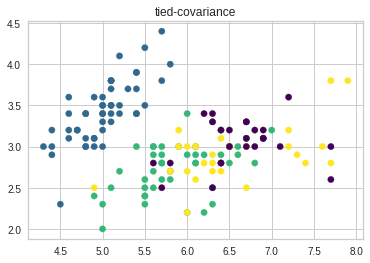

tied-covariance probs [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
Silhouette scores for tied cov: 0.4174973606404849


In [136]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=preds[1], s=40, cmap='viridis')
plt.title('tied-covariance')
plt.show()
print('tied-covariance probs',probs[1][:5].round(3))
print('Silhouette scores for tied cov:',S[1])

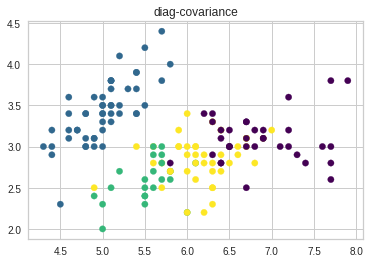

diag-covariance probs [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
Silhouette scores for diag cov: 0.4891162994506008


In [137]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=preds[2], s=40, cmap='viridis')
plt.title('diag-covariance')
plt.show()
print('diag-covariance probs',probs[1][:5].round(3))
print('Silhouette scores for diag cov:',S[2])

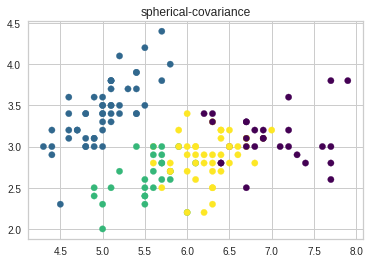

spherical-covariance probs [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
Silhouette scores for spherical cov: 0.4953713128303148


In [138]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=preds[3], s=40, cmap='viridis')
plt.title('spherical-covariance')
plt.show()
print('spherical-covariance probs',probs[3][:5].round(3))
print('Silhouette scores for spherical cov:',S[3])



---



---



## Normalization & repeated steps

In [139]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
print(X_train[0:5])
print(X_train_normalized[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


# kmeans 

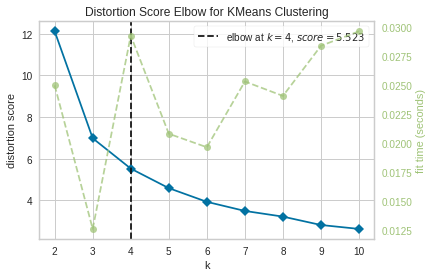

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [140]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans()

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X_train_normalized)    
elb_visualizer.show()  

_ k=4 is the best using elbow method

silhouette_scores [0.6300471284354711, 0.5047687565398589, 0.44506548804598545, 0.3474171297756554, 0.3386788394696141, 0.34344232364549165] 
 k_values [2, 3, 4, 5, 6, 7]


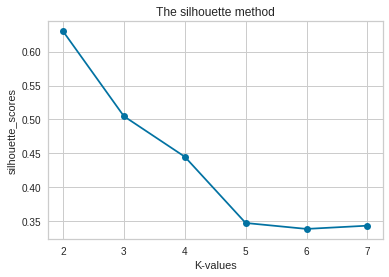

In [141]:
def find_best_clusters(df, maximum_K):
    
    silhouette_scores = []
    k_values = []
    for k in range(2, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        silhouette_scores_values = silhouette_score(df, kmeans_model.labels_, metric='euclidean')
        silhouette_scores.append(silhouette_scores_values)
        k_values.append(k)
    
    return silhouette_scores,k_values
silhouette_scores, k_values=find_best_clusters(X_train_normalized,8)
print('silhouette_scores', silhouette_scores,'\n','k_values',k_values)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('The silhouette method')
plt.xlabel("K-values")
plt.ylabel("silhouette_scores")
plt.show()

_k=2 is the best with silhouette_scores equals 0.6300471284354711



---



---
## Hirarical clustering 



Text(0, 0.5, 'Euclidean distance in the space with other variables')

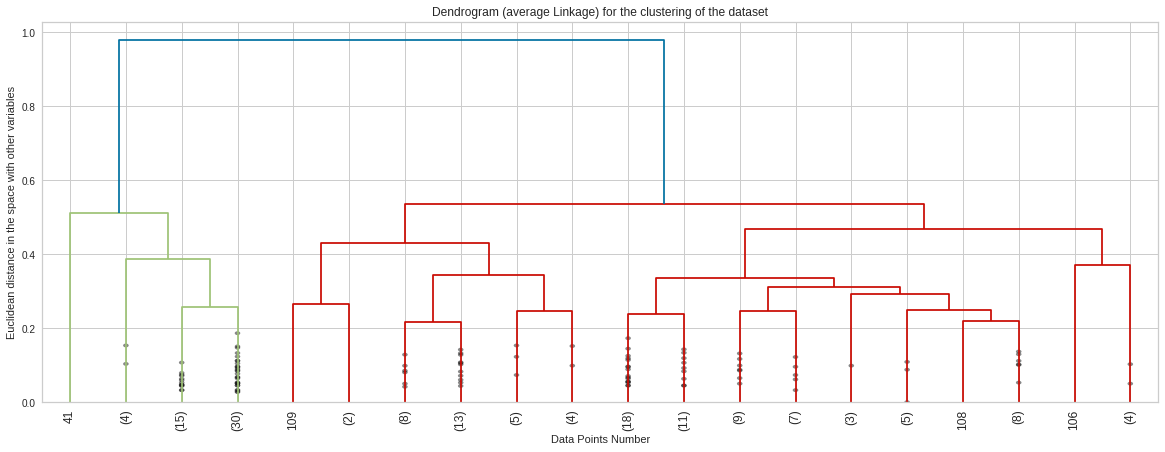

In [142]:
# Dendrogram (Average Linkage) 

Z = sch.linkage(X_train_normalized, method = 'average')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True)
plt.title('Dendrogram (average Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

In [143]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'average')
model_clt = cluster_H.fit(X_train_normalized)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}


In [144]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train_normalized,pred1))

Silhouette Score for 2 Clusters
0.6300471284354711


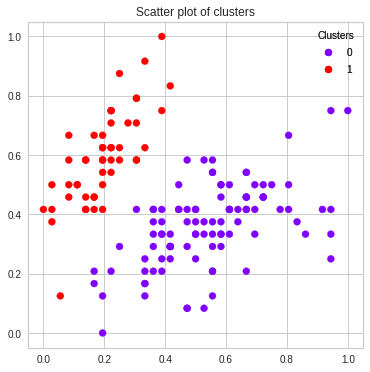

In [145]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train_normalized[:,0], X_train_normalized[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

Text(0, 0.5, 'Euclidean distance in the space with other variables')

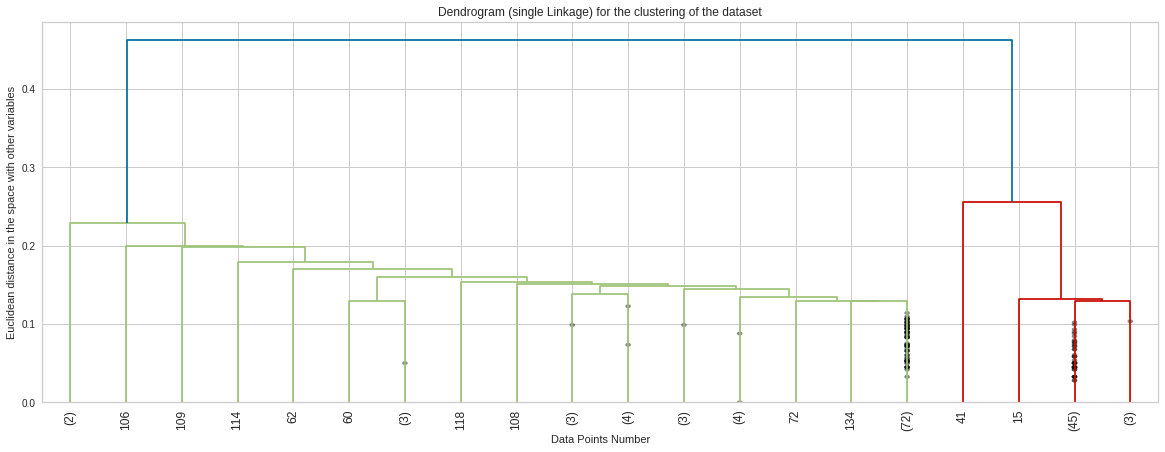

In [146]:
# Dendrogram (single Linkage) 

Z = sch.linkage(X_train_normalized, method = 'single')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True)
plt.title('Dendrogram (single Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

In [147]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'single')
model_clt = cluster_H.fit(X_train_normalized)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
{0: 50, 1: 100}


In [148]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train_normalized,pred1))

Silhouette Score for 2 Clusters
0.6300471284354711


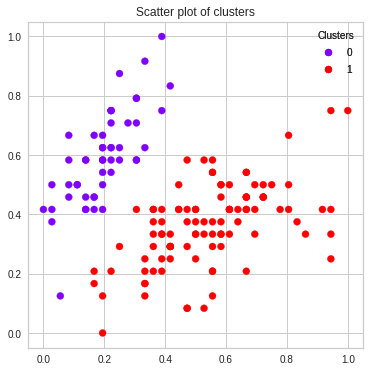

In [149]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train_normalized[:,0], X_train_normalized[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

In [150]:
model1_A = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model1_B = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model1_C = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
model1_D = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='average',distance_threshold=0.05)
model1_E = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='average',distance_threshold=0.7)
model1_F = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.3)
model1_G = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=1)
model1_H = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.01)


clus_A = model1_A.fit(X_train_normalized)
clus_B = model1_B.fit(X_train_normalized)
clus_C = model1_C.fit(X_train_normalized)
clus_D = model1_D.fit(X_train_normalized)
clus_E = model1_E.fit(X_train_normalized)
clus_F = model1_F.fit(X_train_normalized)
clus_G= model1_F.fit(X_train)
clus_H= model1_F.fit(X_train)


In [151]:
print('Output Clusters from model A are')
pred1 = clus_A.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model A')
print(silhouette_score(X_train,pred1))

Output Clusters from model A are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}
Silhouette Score for model A
0.6867350732769777


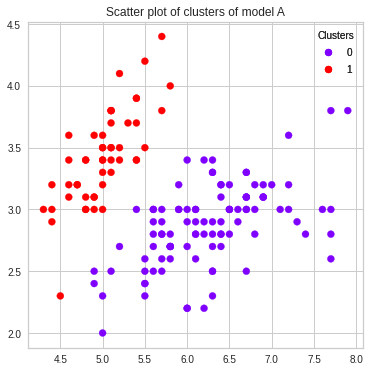

In [152]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model A')

plt.show()

In [153]:
print('Output Clusters from model B are')
pred1 = clus_B.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model B')
print(silhouette_score(X_train,pred1))

Output Clusters from model B are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}
Silhouette Score for model B
0.6867350732769777


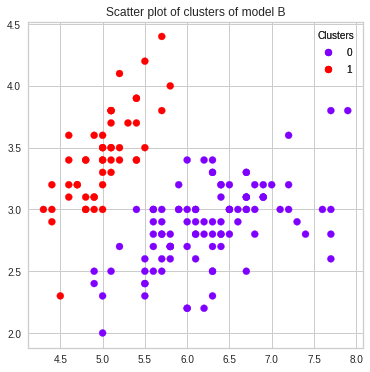

In [154]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model B')

plt.show()

In [155]:
print('Output Clusters from model C are')
pred1 = clus_C.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model C')
print(silhouette_score(X_train,pred1))

Output Clusters from model C are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
{0: 50, 1: 100}
Silhouette Score for model C
0.6867350732769777


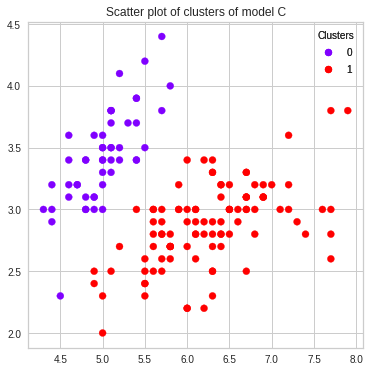

In [156]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model C')

plt.show()

In [157]:
print('Output Clusters from model D are')
pred1 = clus_D.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model D')
print(silhouette_score(X_train,pred1))

Output Clusters from model D are
[ 30  13   0 123 128 106  85   4   5   1  16 125 113 103  69 115  96  26
 126   9  94  99 104 107  86  13  82  30   4   0   1  81  71 109   1 119
 105  89   5   4  26 127  98  40  91 100   9   0  16  66  90 102 110  95
  76 108 129  62  92  65 124  84  87   2 117  63 118  42  78 112  83  88
 101 121  58  64  44  97 111  68  12  12   6  73  43 114  53  77 120  45
 116   2   6  47  52  75   3  70  72   3  51  27  35  48  79  38  74  50
  37  54  93  18 122  32  41  34  31  61  49  24  14  21  67  60  23  55
  57   7   8  80  46  33   8  22  10  36  28  59   7  39  11  25  27  14
  17  19  15  20  29  56]
{0: 3, 1: 3, 2: 2, 3: 2, 4: 3, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 1, 11: 1, 12: 2, 13: 2, 14: 2, 15: 1, 16: 2, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 2, 27: 2, 28: 1, 29: 1, 30: 2, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52

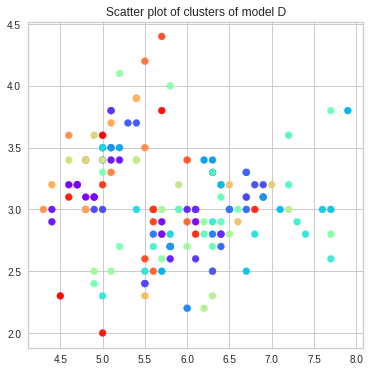

In [158]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model D')

plt.show()

_note : model B & c are good with Silhouette Score 
0.6867350732769777



---



---
# DBscan 


In [159]:
from sklearn.cluster import DBSCAN
def all_equal2(iterator):
    return len(set(iterator)) <= 1
EPS=np.arange(0.1,3.1,0.1).tolist()
Min_samples=np.arange(5,26,5).tolist()
silhouette_scores=[]
for i in range(len(EPS)):
  for j in range(len(Min_samples)):
    dbscan = DBSCAN(eps =EPS[i],min_samples =Min_samples[j]).fit(X_train)
    print('___________________________________________________________________________________________')
    print('Output Clusters ','eps=',EPS[i],'min_samples=',Min_samples[j])
    pred1 = dbscan.labels_
# Frequency count of the Output clusters
    unique, counts = np.unique(pred1, return_counts=True)
    print(dict(zip(unique, counts)))
    # Silhouette Score
    print('Silhouette Score')
    flag=all_equal2(pred1)
    if flag==False:
      x=silhouette_score(X_train,pred1)
      print(x)
      silhouette_scores.append(x)
    else:
      print('just 1 cluster label ,cannot calculate silhouette_score')

print('silhouette_scores list',silhouette_scores)

___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 5
{-1: 150}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 10
{-1: 150}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 15
{-1: 150}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 20
{-1: 150}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 25

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
{0: 50, 1: 100}
Silhouette Score
0.6867350732769777


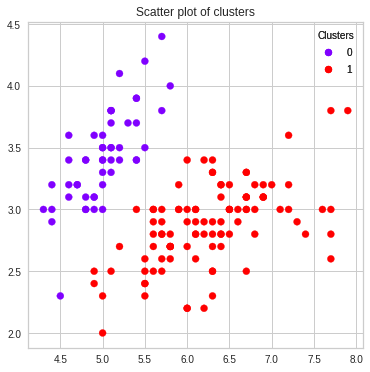

In [160]:
dbscan = DBSCAN(eps =1,min_samples =10).fit(X_train)
pred1 = dbscan.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score')
print(silhouette_score(X_train,pred1))
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

_optimal number of clusters is 2 , when eps= 1 and min_samples=10 ,with Silhouette Score 0.6867350732769777



---



---

# GM

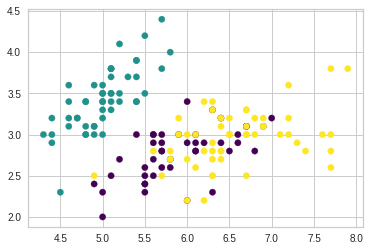

In [161]:
from sklearn.mixture import GaussianMixture
import pandas as pd
gm = GaussianMixture(n_components=3).fit(X_train)
pred = gm.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=pred, s=40, cmap='viridis')
probs = gm.predict_proba(X_train)

In [162]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

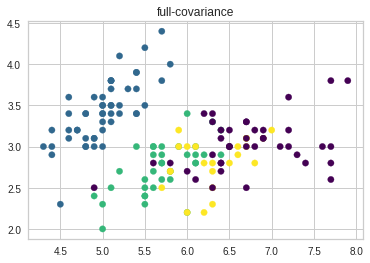

full-covariance probs [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
Silhouette scores for full cov: 0.4130079901573357


In [163]:
from sklearn import metrics # for calculating Silhouette score

cov_lst=['full','tied','diag','spherical']
preds=[]
probs=[]
gmms=[]
S=[]

for i in range(len(cov_lst)):
  gmm = GaussianMixture(n_components=4, covariance_type=cov_lst[i], random_state=42).fit(X_train)
  gmms.append(gmm)
  pred = gmm.predict(X_train)
  preds.append(pred)
  prob = gmm.predict_proba(X_train)
  probs.append(prob)
  S.append(metrics.silhouette_score(X_train,pred, metric='euclidean'))

# print(gmms)

  # print(i, pred )
  # print(preds)
plt.scatter(X_train[:, 0], X_train[:, 1], c=preds[0], s=40, cmap='viridis')
plt.title('full-covariance')
plt.show()
print('full-covariance probs',probs[0][:5].round(3))
print('Silhouette scores for full cov:',S[0])

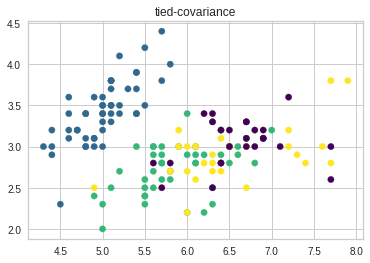

tied-covariance probs [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
Silhouette scores for tied cov: 0.4174973606404849


In [164]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=preds[1], s=40, cmap='viridis')
plt.title('tied-covariance')
plt.show()
print('tied-covariance probs',probs[1][:5].round(3))
print('Silhouette scores for tied cov:',S[1])

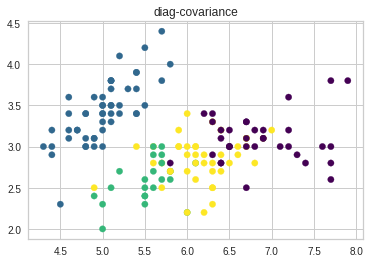

diag-covariance probs [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
Silhouette scores for diag cov: 0.4891162994506008


In [165]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=preds[2], s=40, cmap='viridis')
plt.title('diag-covariance')
plt.show()
print('diag-covariance probs',probs[1][:5].round(3))
print('Silhouette scores for diag cov:',S[2])

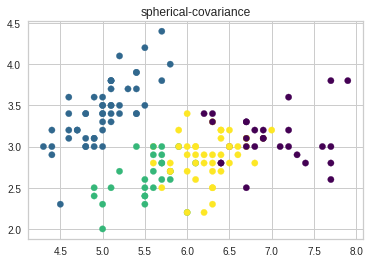

spherical-covariance probs [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
Silhouette scores for spherical cov: 0.4953713128303148


In [166]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=preds[3], s=40, cmap='viridis')
plt.title('spherical-covariance')
plt.show()
print('spherical-covariance probs',probs[3][:5].round(3))
print('Silhouette scores for spherical cov:',S[3])

_note : Silhouette score for spherical cov:0.4953713128303148 is the best 

# conclusion 
Before normalization:
- for kmeans K=3 is the best using  silhouette_score 0.5528190123564095 
- for hirarical ,silhouette_score 0.6867350732769777 models A&B
- for Dbscan , eps= 1.6 min_samples= 25 Silhouette Score 0.6867350732769777
- for GM ,Silhouette scores for spherical cov: 0.4953713128303148


After normalization :
- for kmeans K=2 is the best using  silhouette_score 0.6300471284354711
- for hirarical ,silhouette_score 0.6867350732769777 models A&B&C
- for Dbscan , when eps= 1 and min_samples=10 ,with Silhouette Score 0.6867350732769777
- for GM ,Silhouette scores for spherical cov: 0.4953713128303148